<a href="https://colab.research.google.com/github/Mohit03singh/Bike-Sharing-Demand-Prediction/blob/main/capstone_project_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Name : Seoul Bike Sharing Demand Prediction </u></b>

# <b><u> Name : Mohit </u></b>

# <b><u>Group:Santiago</b></u>

## <b><u>Github:https://github.com/Mohit03singh/Bike-Sharing-Demand-Prediction</b></u>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [159]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [160]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
# loading the dataset
df=pd.read_csv('/content/drive/MyDrive/capstone_project_06/SeoulBikeData.csv',encoding ='latin')

### Dataset Rows & Columns count

In [162]:
# checking for shape
df.shape

(8760, 14)

In [163]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [164]:
# Renaming Columns
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [165]:
# Checking top 5 records in dataframe
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [166]:
# Checking bottom 5 records in dataframe
df.tail()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Dataset Information

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             8760 non-null   object 
 1   bike_count       8760 non-null   int64  
 2   hour             8760 non-null   int64  
 3   temp             8760 non-null   float64
 4   humidity         8760 non-null   int64  
 5   wind             8760 non-null   float64
 6   visibility       8760 non-null   int64  
 7   dew_temp         8760 non-null   float64
 8   sunlight         8760 non-null   float64
 9   rain             8760 non-null   float64
 10  snow             8760 non-null   float64
 11  season           8760 non-null   object 
 12  holiday          8760 non-null   object 
 13  functioning_day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [168]:
df.describe(percentiles=[.01,.25,.5,.75,.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
bike_count,8760.0,704.602055,644.997468,0.0,0.000,191.00,504.50,1065.25,2526.23,3556.00
hour,8760.0,11.500000,6.922582,0.0,0.000,5.75,11.50,17.25,23.00,23.00
temp,8760.0,12.882922,11.944825,-17.8,-12.741,3.50,13.70,22.50,35.10,39.40
humidity,8760.0,58.226256,20.362413,0.0,17.000,42.00,57.00,74.00,97.00,98.00
wind,8760.0,1.724909,1.036300,0.0,0.100,0.90,1.50,2.30,4.70,7.40
visibility,8760.0,1436.825799,608.298712,27.0,173.000,940.00,1698.00,2000.00,2000.00,2000.00
dew_temp,8760.0,4.073813,13.060369,-30.6,-24.800,-4.70,5.10,14.80,24.70,27.20
sunlight,8760.0,0.569111,0.868746,0.0,0.000,0.00,0.01,0.93,3.17,3.52
rain,8760.0,0.148687,1.128193,0.0,0.000,0.00,0.00,0.00,4.00,35.00
snow,8760.0,0.075068,0.436746,0.0,0.000,0.00,0.00,0.00,2.50,8.80


## Missing Values / Null values

In [169]:
# Missing data counts
df.isnull().sum()

date               0
bike_count         0
hour               0
temp               0
humidity           0
wind               0
visibility         0
dew_temp           0
sunlight           0
rain               0
snow               0
season             0
holiday            0
functioning_day    0
dtype: int64

## Visualizing the missing values

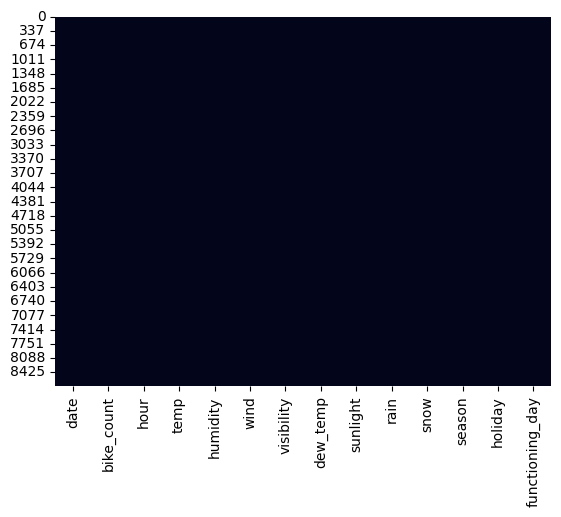

In [170]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

sns.heatmap(df.isnull(), cbar=False);

### What did you know about your dataset?

* There are 8760 observation and 14 features.
* In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset
* There are no null values.
* Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
* Date has some object data types, it should be datetime data type.

## Duplicate Values

In [171]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {df.duplicated().value_counts()},unique values with {len(df[df.duplicated()])} duplication")

Data is duplicated ? False    8760
Name: count, dtype: int64,unique values with 0 duplication


In [172]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


### Check Unique Values for each variable.

In [173]:
# Check Unique Values for each variable.

# bike_df.nunique()
for i in df.columns.tolist():
  print(f"No. of unique values in {i} is {df[i].nunique()}.")

No. of unique values in date is 365.
No. of unique values in bike_count is 2166.
No. of unique values in hour is 24.
No. of unique values in temp is 546.
No. of unique values in humidity is 90.
No. of unique values in wind is 65.
No. of unique values in visibility is 1789.
No. of unique values in dew_temp is 556.
No. of unique values in sunlight is 345.
No. of unique values in rain is 61.
No. of unique values in snow is 51.
No. of unique values in season is 4.
No. of unique values in holiday is 2.
No. of unique values in functioning_day is 2.


##Breaking date column

In [174]:
# Changing the "Date" column into three "year","month","day" column
import datetime as dt
df['date'] = df['date'].str.replace('-', '/')
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))




In [175]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

In [176]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['date','day','year'],axis=1)

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [177]:
df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

##Changing data type

* ***As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.***

In [178]:
#Change the int64 column into catagory column
cols=['hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [179]:
#let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bike_count        8760 non-null   int64   
 1   hour              8760 non-null   category
 2   temp              8760 non-null   float64 
 3   humidity          8760 non-null   int64   
 4   wind              8760 non-null   float64 
 5   visibility        8760 non-null   int64   
 6   dew_temp          8760 non-null   float64 
 7   sunlight          8760 non-null   float64 
 8   rain              8760 non-null   float64 
 9   snow              8760 non-null   float64 
 10  season            8760 non-null   object  
 11  holiday           8760 non-null   object  
 12  functioning_day   8760 non-null   object  
 13  month             8760 non-null   category
 14  weekdays_weekend  8760 non-null   category
dtypes: category(3), float64(6), int64(3), object(3)
memory usage: 848.2+ KB


In [180]:
df.columns

Index(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility',
       'dew_temp', 'sunlight', 'rain', 'snow', 'season', 'holiday',
       'functioning_day', 'month', 'weekdays_weekend'],
      dtype='object')

## ***2. Understanding Your Variables***

In [181]:
# Dataset Columns
print(f'Features: {df.columns.to_list()}')

Features: ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_temp', 'sunlight', 'rain', 'snow', 'season', 'holiday', 'functioning_day', 'month', 'weekdays_weekend']


# **Preprocessing the dataset**

##**Why do we need to handle missing values?**

* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first***

#### Missing Values/Null Values

In [182]:
# Missing Values/Null Values Count
df.isnull().sum()

bike_count          0
hour                0
temp                0
humidity            0
wind                0
visibility          0
dew_temp            0
sunlight            0
rain                0
snow                0
season              0
holiday             0
functioning_day     0
month               0
weekdays_weekend    0
dtype: int64

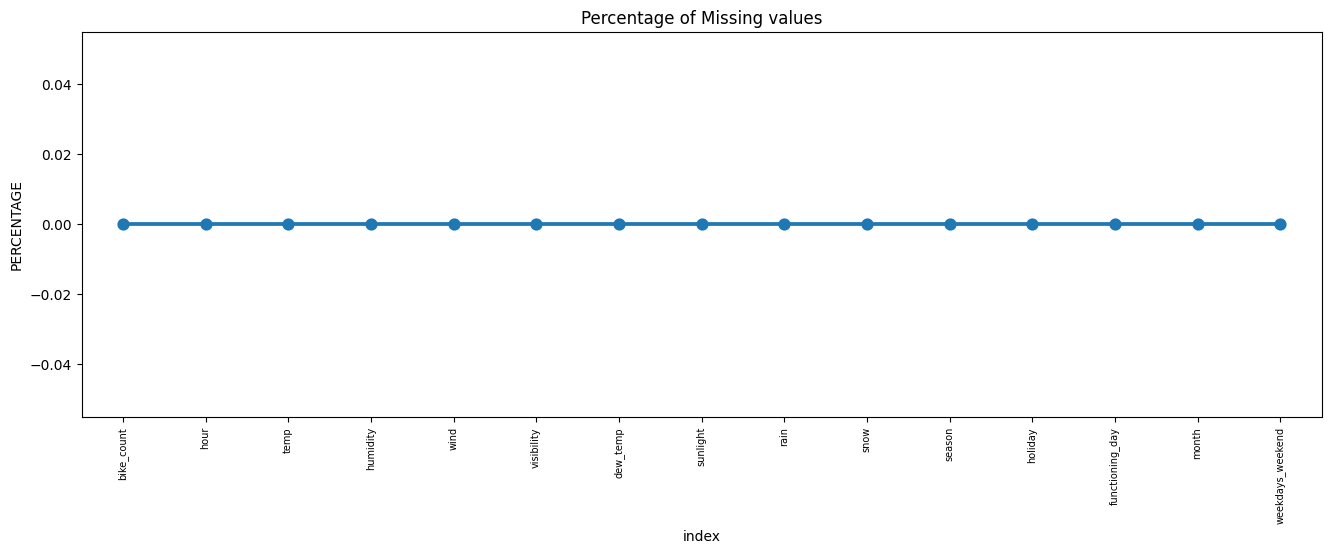

In [183]:
# Visualizing the missing values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

**Why is it important to remove duplicate records from my data?**
* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. By removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.**

# Checking Duplicate Values


In [184]:
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***Some of  the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.***

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis Of The Data Set**

## **Univariate Analysis**

## **Analysis of Dependent Variable:**

  **What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***

* ***From the above bar plot we can clearly say that, from the month 5 to 10
 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.***

####weekdays_weekend

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#let's check the result of data type

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bike_count        8760 non-null   int64   
 1   hour              8760 non-null   category
 2   temp              8760 non-null   float64 
 3   humidity          8760 non-null   int64   
 4   wind              8760 non-null   float64 
 5   visibility        8760 non-null   int64   
 6   dew_temp          8760 non-null   float64 
 7   sunlight          8760 non-null   float64 
 8   rain              8760 non-null   float64 
 9   snow              8760 non-null   float64 
 10  season            8760 non-null   object  
 11  holiday           8760 non-null   object  
 12  functioning_day   8760 non-null   object  
 13  month             8760 non-null   category
 14  weekdays_weekend  8760 non-null   category
dtypes: category(3), float64(6), int64(3), object(3)
memory usage: 848.2+ KB


##**Analysation of categorical variables**

* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type***

####Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

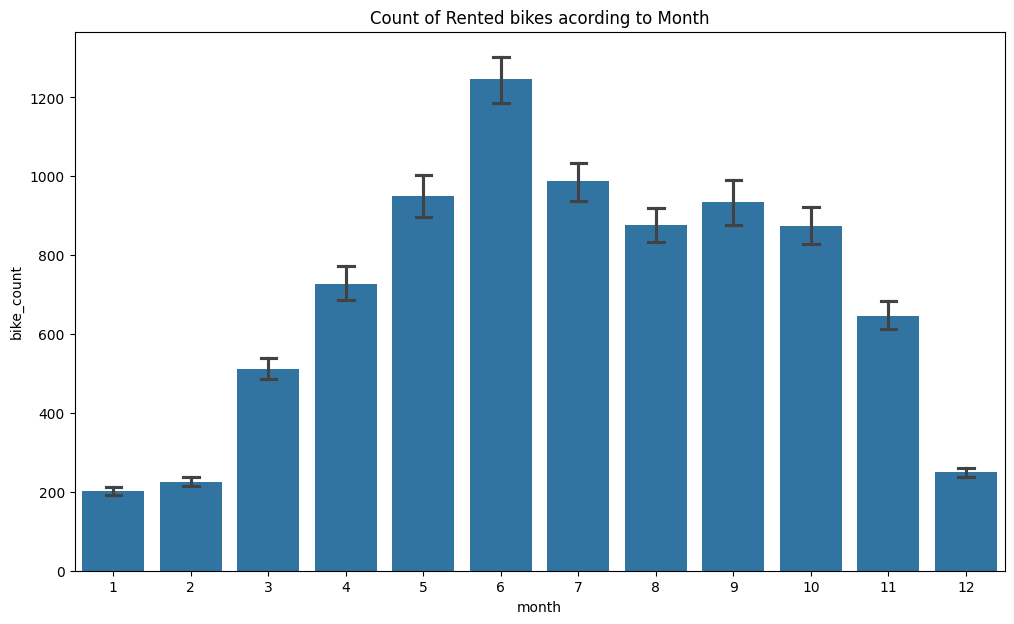

In [187]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=df,x='month',y='bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')

* ***From the above bar plot we can clearly say that, from the month 5 to 10
 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.***

####weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

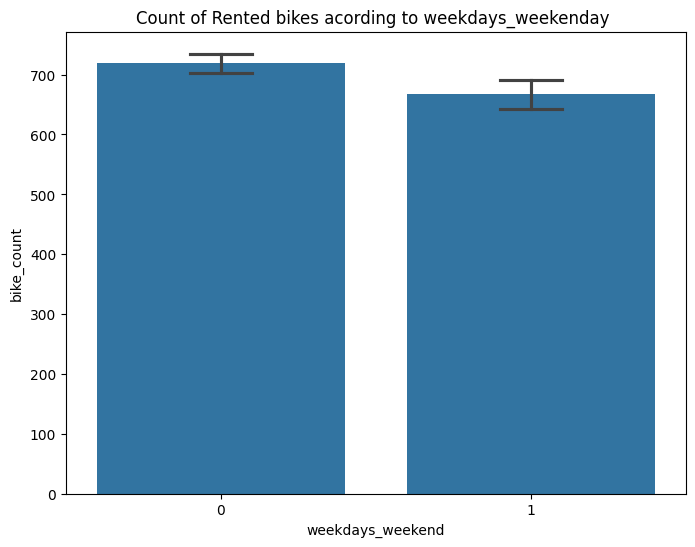

In [188]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=df,x='weekdays_weekend',y='bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

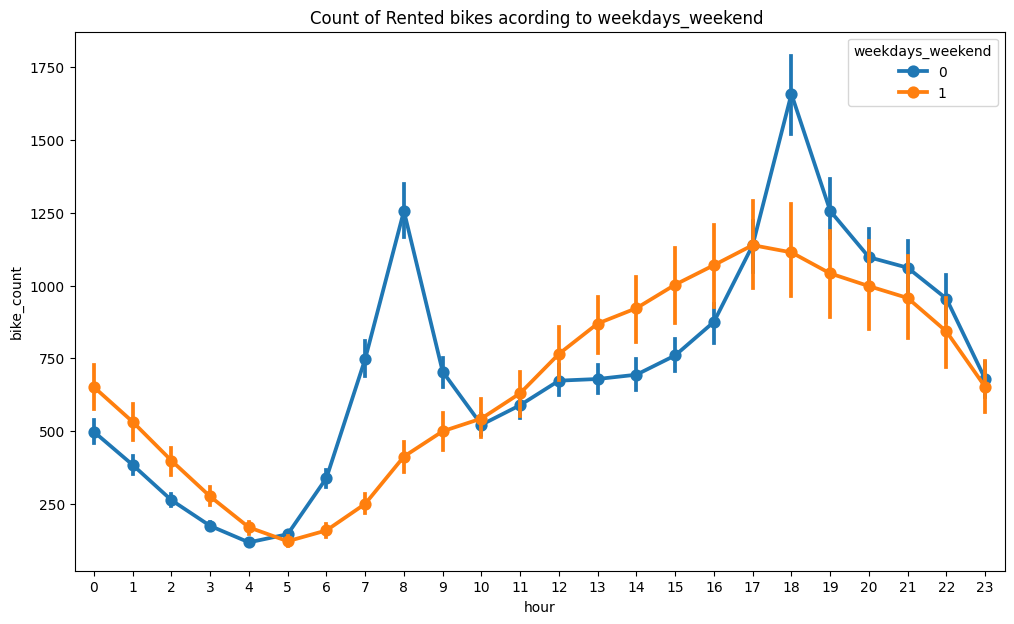

In [189]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=df,x='hour',y='bike_count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

* ***From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***

####Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

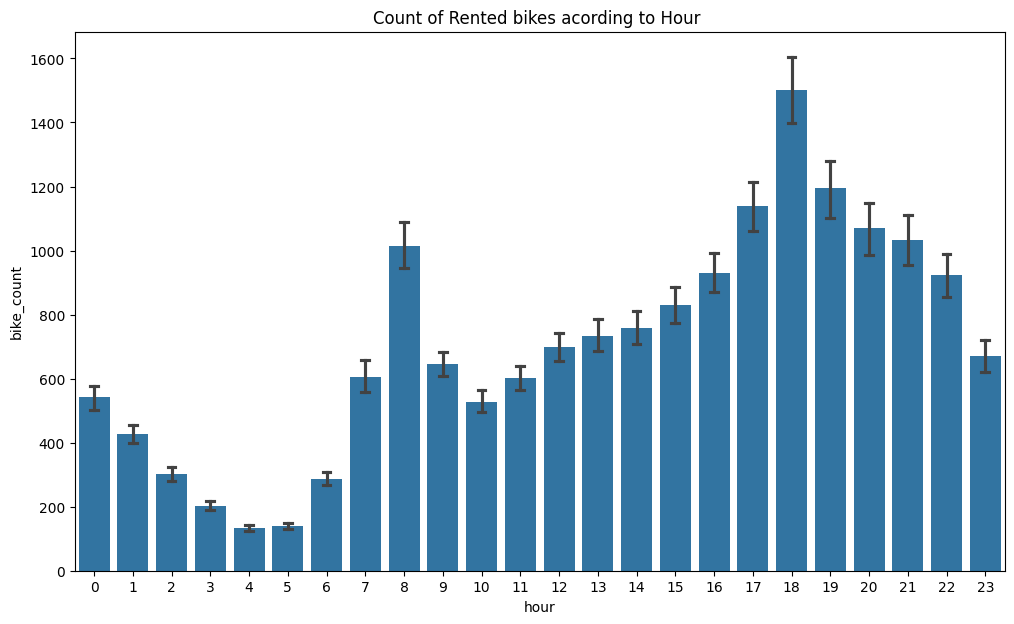

In [190]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=df,x='hour',y='bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

* ***In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***

####Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

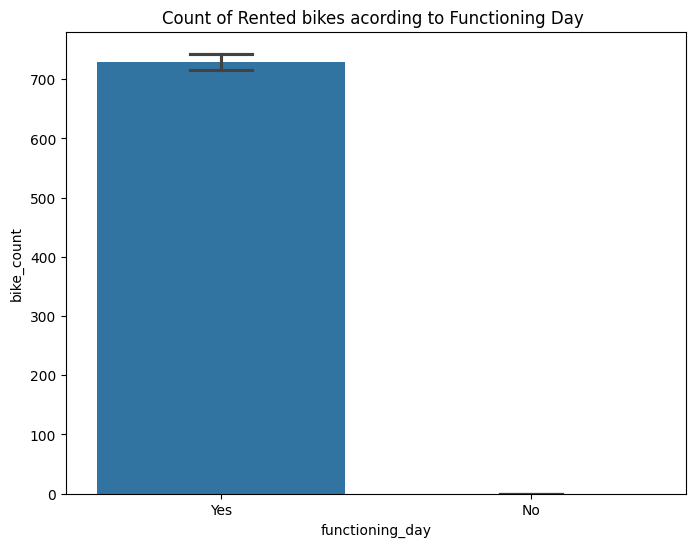

In [191]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=df,x='functioning_day',y='bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

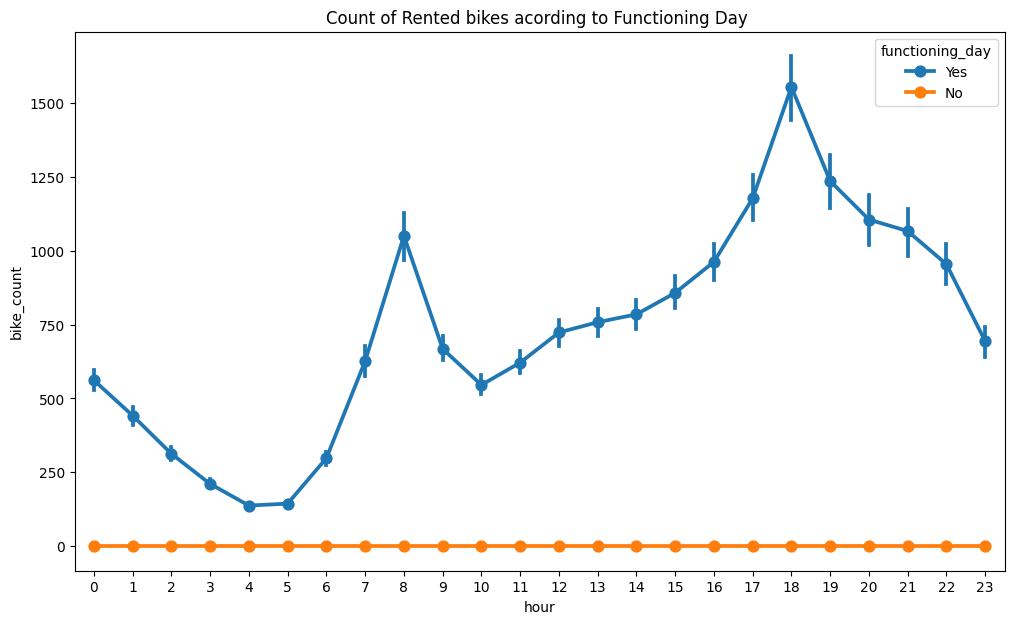

In [192]:
 #anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=df,x='hour',y='bike_count',hue='functioning_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

* ***In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,***
* ***Peoples don't use reneted bikes in no functioning day.***

####Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

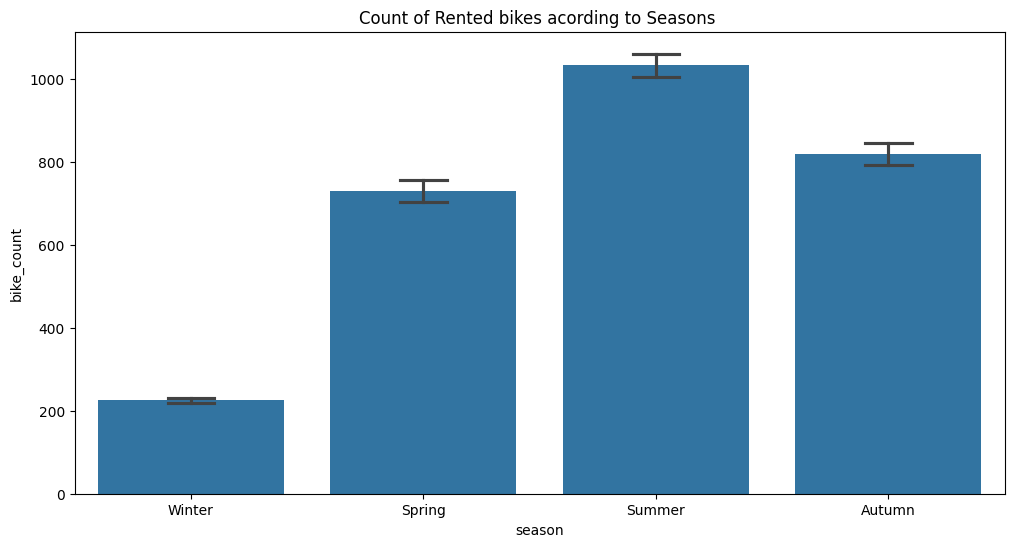

In [193]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=df,x='season',y='bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

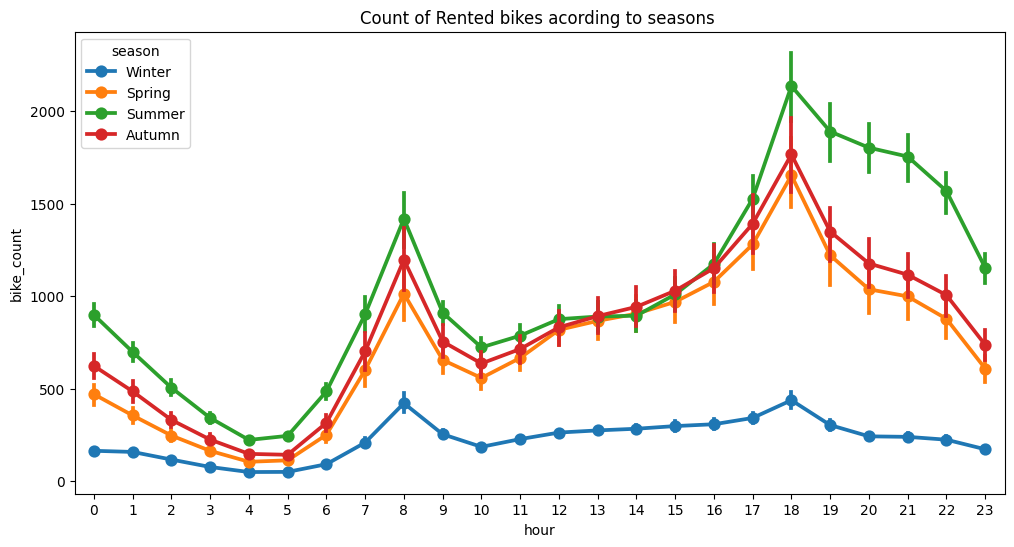

In [194]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=df,x='hour',y='bike_count',hue='season',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

* ***In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.***
* ***In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.***

####Holiday


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

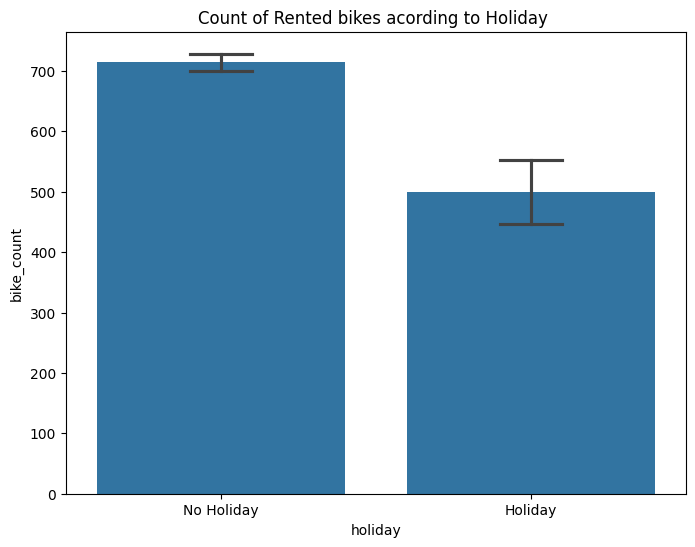

In [195]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=df,x='holiday',y='bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

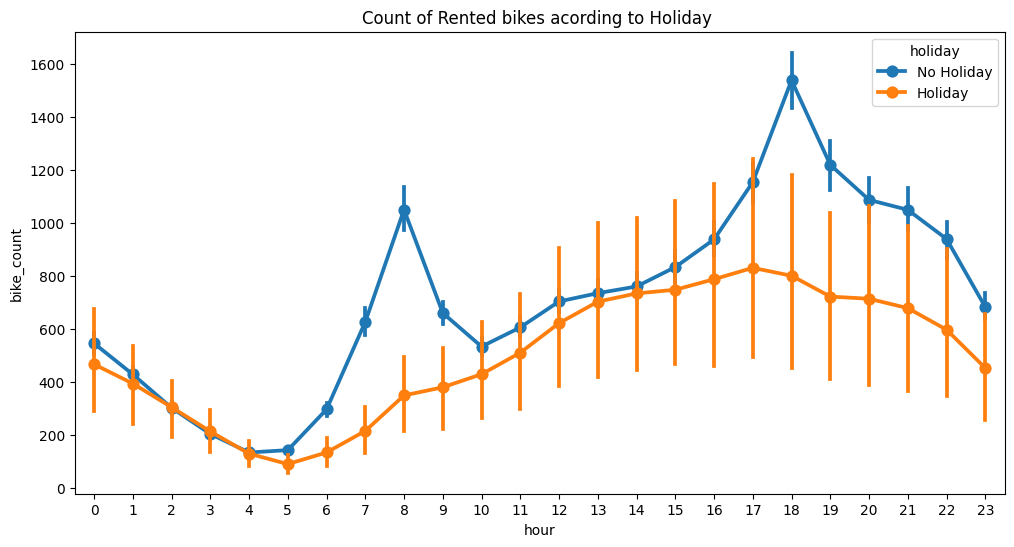

In [196]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=df,x='hour',y='bike_count',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* ***In holiday, people uses the rented bike from 2pm-8pm***

##<b> Pays little attention to the skewness of our numerical features

In [197]:
# separate numerical features from the dataframe
numeric_features= df.select_dtypes(exclude=['object','category'])
numeric_features

,bike_count,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


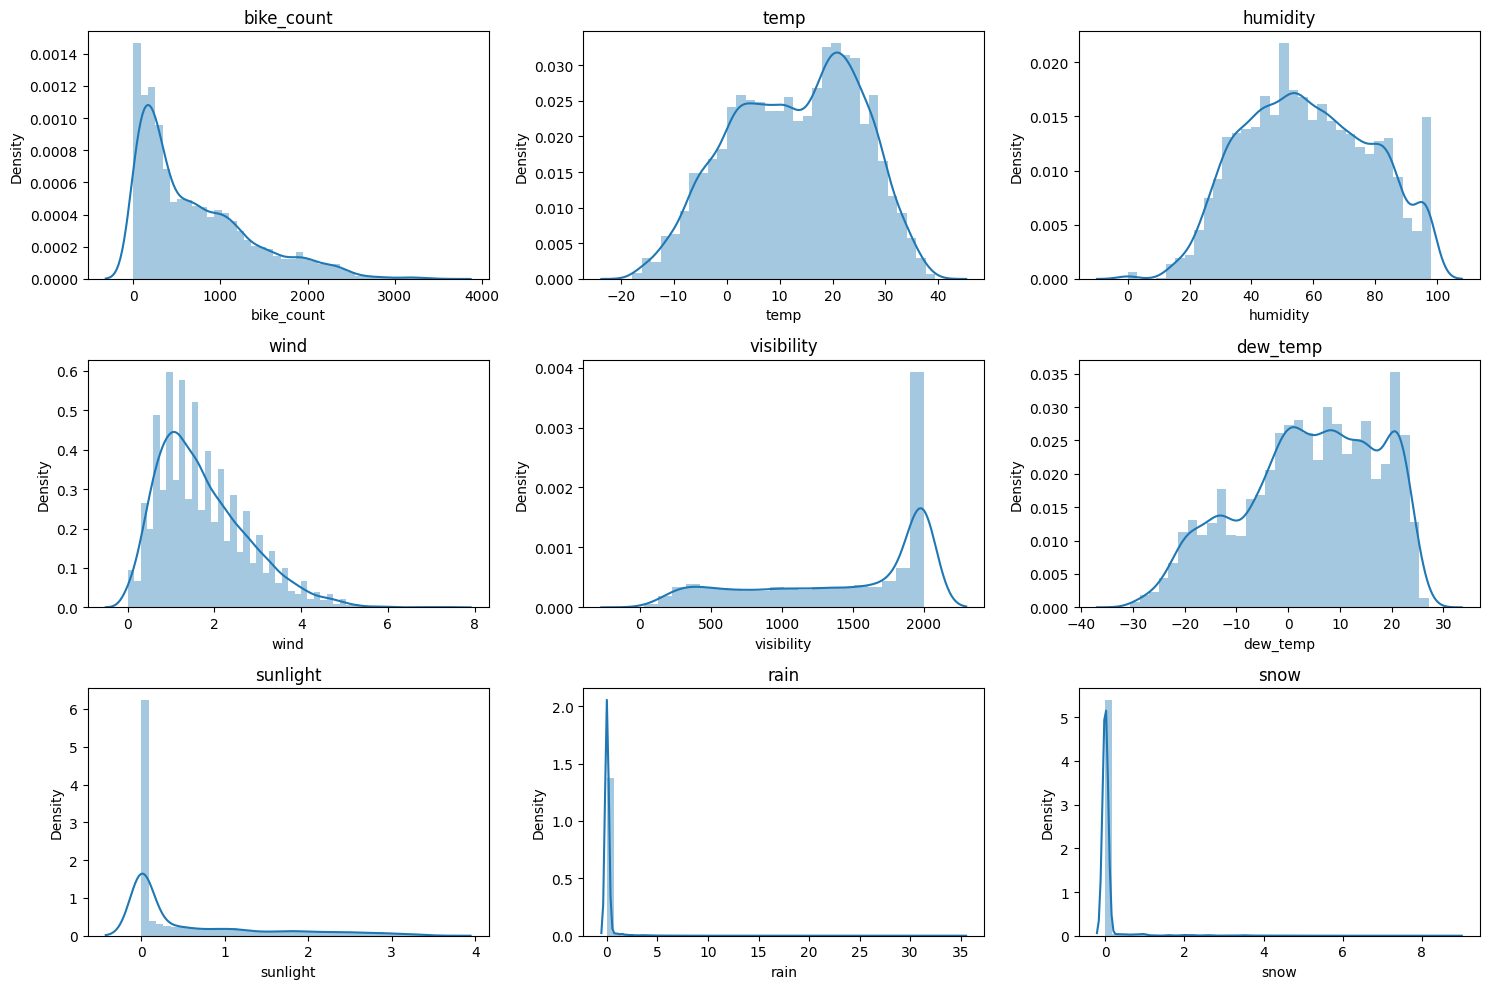

In [198]:
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m),
Dew point temperature(°C)


##<b> Lets try to find how is the relation of numerical features with our dependent variable

### **REGRESSION PLOT**

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

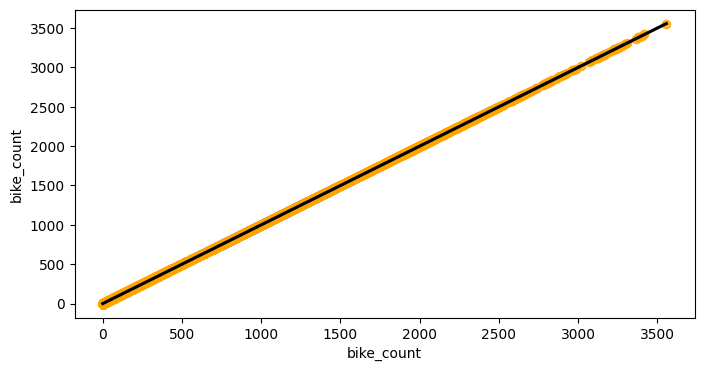

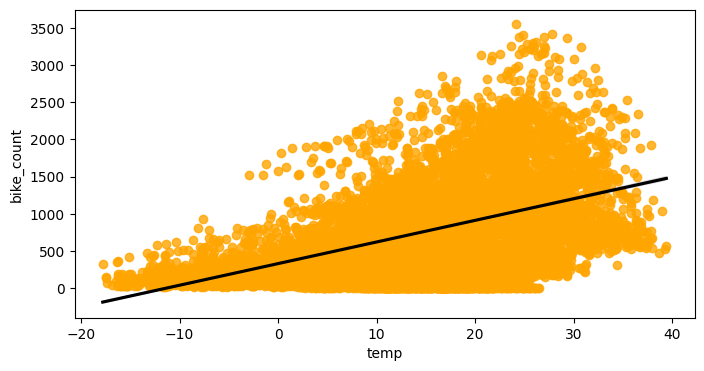

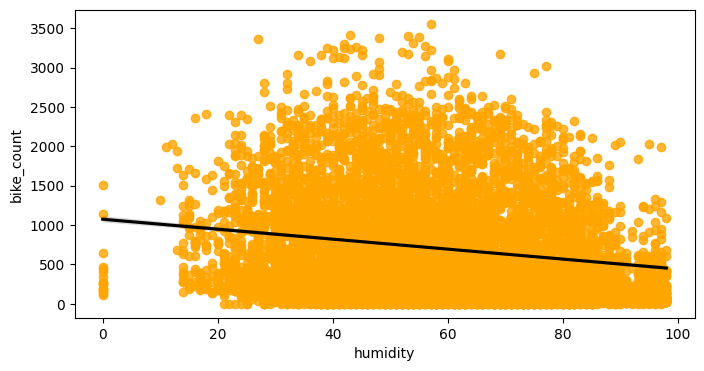

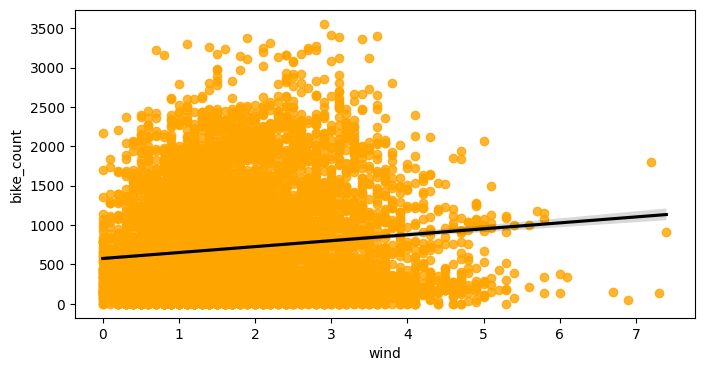

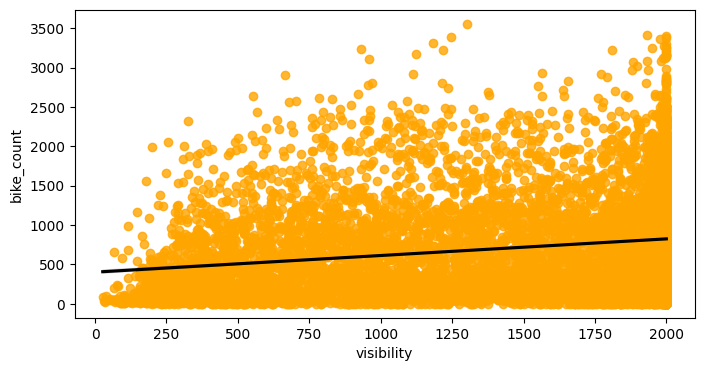

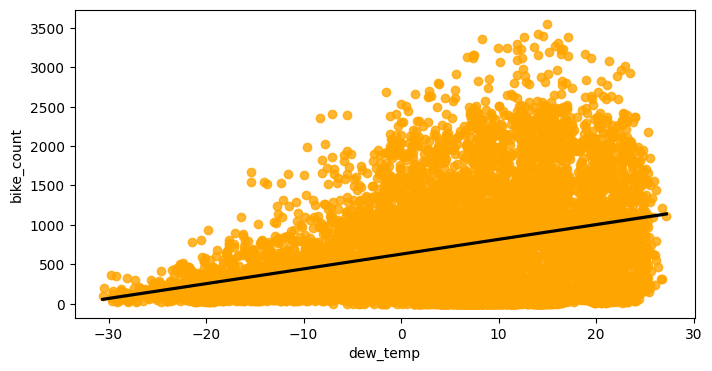

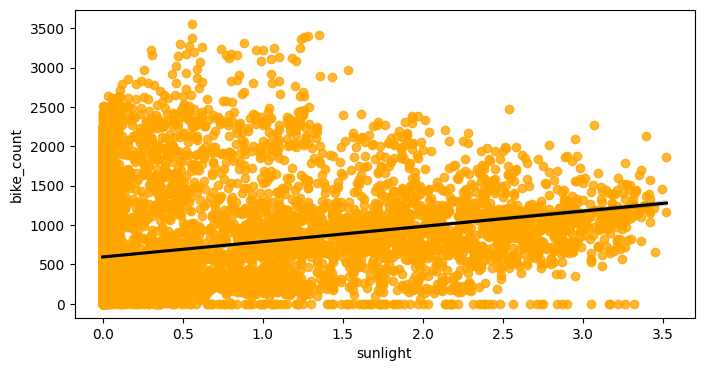

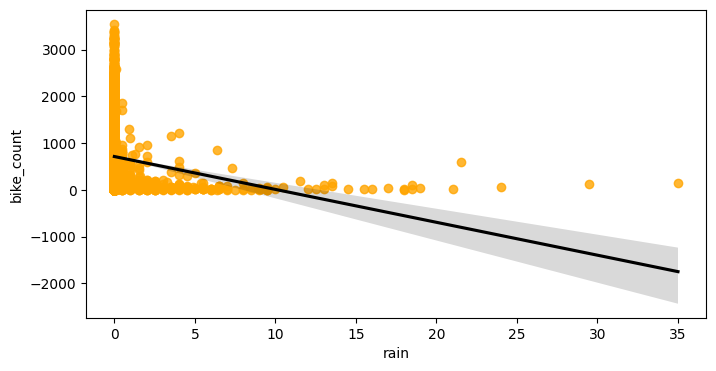

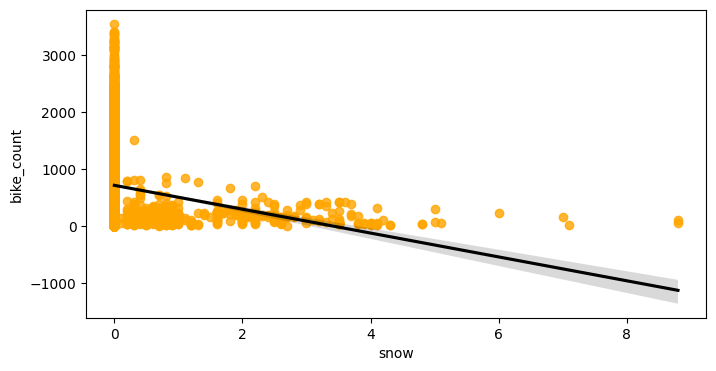

In [204]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=df[col],y=df['bike_count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

##**Normalise Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

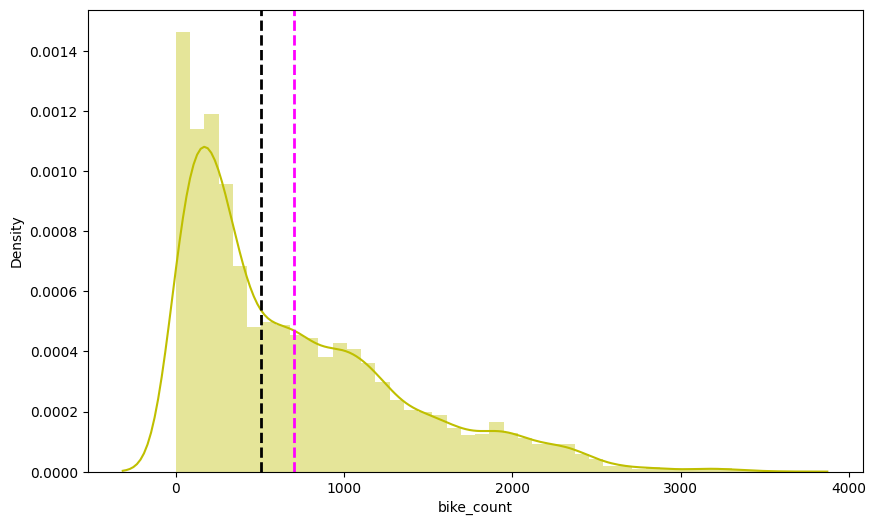

In [205]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('bike_count')
ax=sns.distplot(df['bike_count'],hist=True ,color="y")
ax.axvline(df['bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

##**Finding Outliers and treatment**

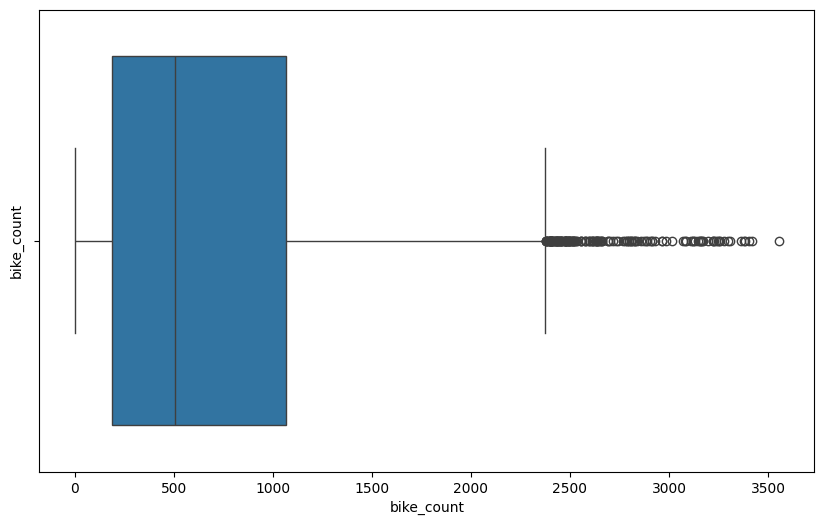

In [206]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('bike_count')
sns.boxplot(x=df['bike_count'])
plt.show()

In [207]:
# outliers treatments
df.loc[df['rain']>=4,'rain']= 4
df.loc[df['sunlight']>=2.5,'sunlight']=2.5
df.loc[df['snow']>2,'snow']= 2
df.loc[df['wind']>=4,'wind']= 4


we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

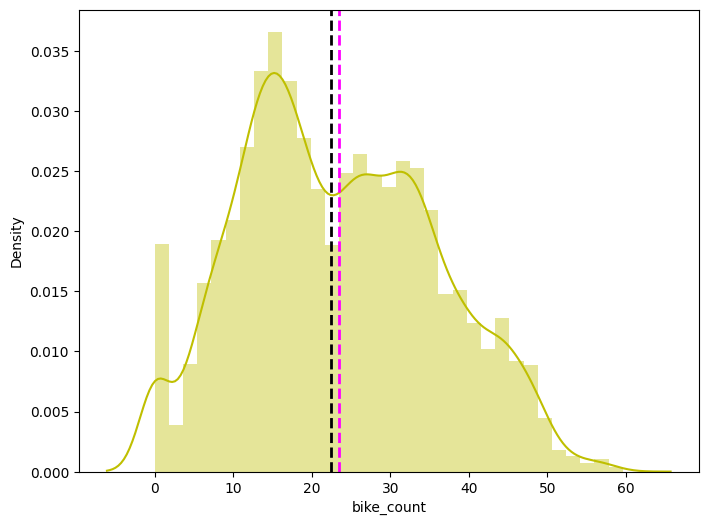

In [208]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('bike count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['bike_count']), color="y")
ax.axvline(np.sqrt(df['bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

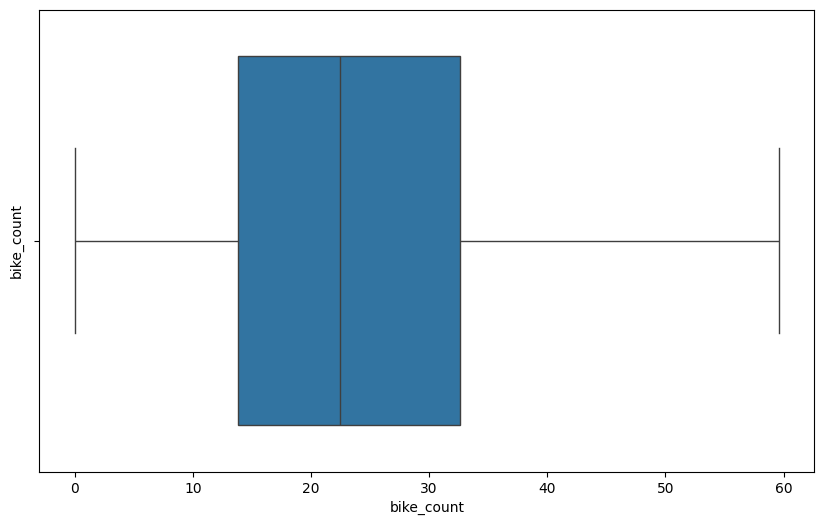

In [209]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('bike_count')
sns.boxplot(x=np.sqrt(df['bike_count']))
plt.show()

###Checking in OLS Model

In [211]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = df[[ 'temp','humidity',
       'wind', 'visibility','dew_temp',
       'sunlight', 'rain', 'snow']]
Y = df['bike_count']
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [212]:
#add a constant column
X = sm.add_constant(X)
X

,const,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [213]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bike_count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:49:51   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        699.4173    106.562      6.563      0.000     490.531     908.304
temp          40.3283      4.160      9.695      0.000      32.175      48.482
humidity      -8.5913      1.193     -7.203      0.000     -10.929      -6.253
wind          62.4552      5.951     10.495      0.000      50.790      74.121
visibility    -0.0137      0.011     -1.254      0.210      -0.035       0.008
dew_temp      -5.0068      4.394     -1.139      0.255     -13.621       3.607
sunlight    -124.1270      9.254    -13.413      0.000    -142.267    -105.987
rain        -162.0914     11.237    -14.425      0.000    -184.118    -140.065
snow          53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is  explained by the model.**
*  **For F statistic , P value is less than 0.05 for 5% levelof significance.**
*  **P value of dew point temp and visibility are very high and they are not significant.**

*  **Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.**
*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**   
*  **Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**

In [214]:
X.corr()

,const,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
wind,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
dew_temp,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
sunlight,NaN,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
rain,NaN,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
snow,NaN,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


* ***From the OLS model we find that the 'Temperature' and  'Dew_point_temperature' are highly correlated so we need to drop one of them.***
* ***For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column***
* ***For clarity, we use visualisation i.e heatmap in next step***

###**Heatmap**

In [216]:
# drop the Dew point temperature column
df=df.drop(['dew_temp'],axis=1)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bike_count        8760 non-null   int64   
 1   hour              8760 non-null   category
 2   temp              8760 non-null   float64 
 3   humidity          8760 non-null   int64   
 4   wind              8760 non-null   float64 
 5   visibility        8760 non-null   int64   
 6   sunlight          8760 non-null   float64 
 7   rain              8760 non-null   float64 
 8   snow              8760 non-null   float64 
 9   season            8760 non-null   object  
 10  holiday           8760 non-null   object  
 11  functioning_day   8760 non-null   object  
 12  month             8760 non-null   category
 13  weekdays_weekend  8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


## **Feature Engineering & Data Pre-processing**


###One Hot Encoding


In [218]:
#Assign all categorical features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['hour', 'season', 'holiday', 'functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [219]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,bike_count,temp,humidity,wind,visibility,sunlight,rain,snow,hour_1,hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,...,False,False,False,False,False,False,False,False,True,False
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,True,False
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False


#**Model Training**

##**Train Test split for regression**

In [220]:
#Assign the value in X and Y
X = df_copy.drop(columns=['bike_count'], axis=1)
y = np.sqrt(df_copy['bike_count'])

In [221]:
X.head()

,temp,humidity,wind,visibility,sunlight,rain,snow,hour_1,hour_2,hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,-6.2,40,0.9,2000,0.0,0.0,0.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,-6.0,36,2.3,2000,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [222]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: bike_count, dtype: float64

In [223]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [224]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_count           8760 non-null   int64  
 1   temp                 8760 non-null   float64
 2   humidity             8760 non-null   int64  
 3   wind                 8760 non-null   float64
 4   visibility           8760 non-null   int64  
 5   sunlight             8760 non-null   float64
 6   rain                 8760 non-null   float64
 7   snow                 8760 non-null   float64
 8   hour_1               8760 non-null   bool   
 9   hour_2               8760 non-null   bool   
 10  hour_3               8760 non-null   bool   
 11  hour_4               8760 non-null   bool   
 12  hour_5               8760 non-null   bool   
 13  hour_6               8760 non-null   bool   
 14  hour_7               8760 non-null   bool   
 15  hour_8               8760 non-null   b

In [225]:
df_copy.describe().columns

Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'sunlight',
       'rain', 'snow'],
      dtype='object')

# LINEAR REGRESSION

In [226]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [227]:
#check the score
reg.score(X_train, y_train)

0.791252853377143

In [228]:
#check the coefficeint
reg.coef_

array([ 4.68899686e-01, -1.02733686e-01,  1.83389932e-02,  6.99377347e-04,
        9.18648101e-01, -5.11433440e+00, -2.17361057e-01, -2.18196972e+00,
       -5.03358899e+00, -7.07227656e+00, -9.68767884e+00, -9.28180883e+00,
       -4.17525131e+00,  1.98924368e+00,  7.41923561e+00,  1.62031037e+00,
       -3.02792590e+00, -3.03027527e+00, -1.90798462e+00, -2.28030752e+00,
       -2.40532863e+00, -1.09497887e+00,  7.19611360e-01,  4.50143285e+00,
        1.07240063e+01,  7.21392625e+00,  6.19079708e+00,  6.27641939e+00,
        5.13030344e+00,  1.46615648e+00, -9.03397290e+07,  4.78702031e+07,
       -7.87118106e+07,  3.41060308e+00,  2.83867043e+01, -6.19500042e-01,
        1.16279214e+07,  1.16279231e+07,  1.16279256e+07, -1.26582005e+08,
       -1.26582011e+08, -1.26582013e+08, -7.87118041e+07, -7.87118016e+07,
       -7.87118030e+07,  2.04432372e+00, -1.36518278e+00])

In [229]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [230]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.145114805768415
RMSE : 5.669666198795871
MAE : 4.30109837175655
R2 : 0.791252853377143
Adjusted R2 : 0.7866725004867255


**Looks like our train set's r2 score value is 0.79 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [231]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [232]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 31.21751120108675
RMSE : 5.587263301571419
MAE : 4.260531657874549
R2 : 0.8023787935913236
Adjusted R2 : 0.7980425673069129


**The test set's r2_score is 0.80. This means our linear model is
performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [233]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

**Heteroscedasticity**

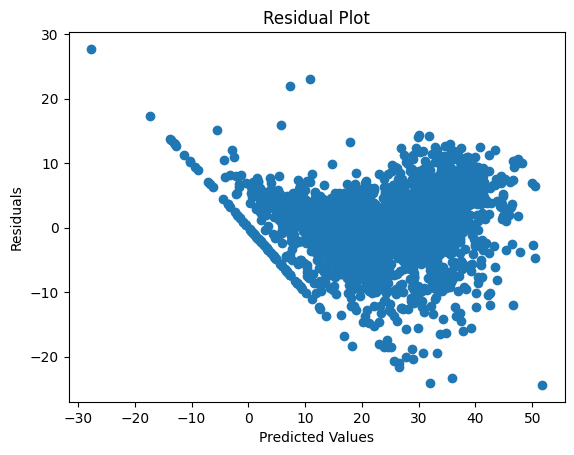

In [234]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

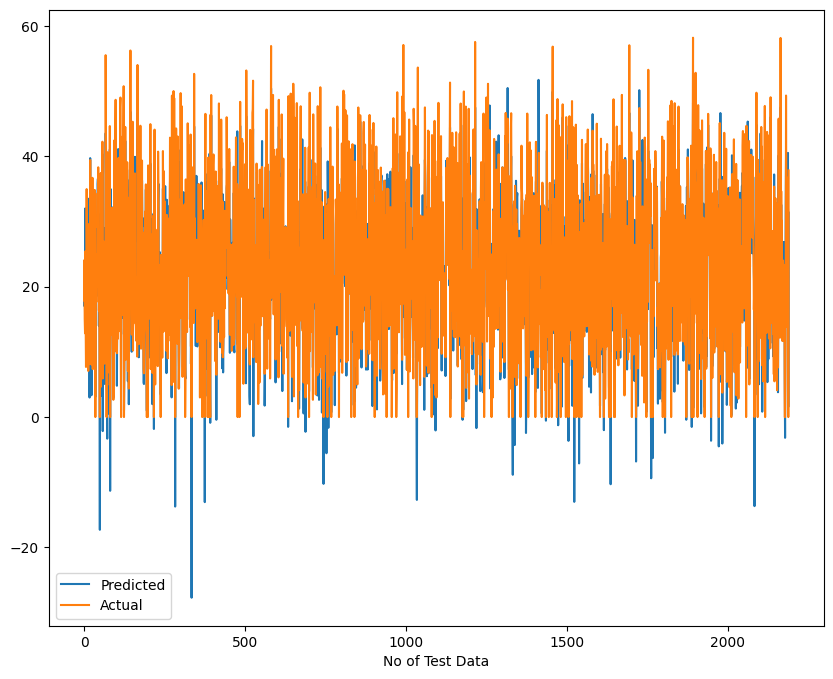

In [235]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Ridge and Lasso Regression**

* Ridge and Lasso Regression are types of Regularization techniques
* Regularization techniques are used to deal with overfitting and when the dataset is large
* Ridge and Lasso Regression involve adding penalties to the regression function

#**Lasso Regression**

In [236]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [237]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38086483341841226 0.3983632039954085


In [238]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [239]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 92.6464586070881
RMSE : 9.625303039753508
MAE : 7.304643598875601
R2 : 0.3983632039954085
Adjusted R2 : 0.38516202313069525


**Looks like train set's r2 score value is 0.39 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [240]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
#training_df=training_df.append(dict1,ignore_index=True)
traning_df=pd.DataFrame(dict1,index=[1])

In [241]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 97.80255544932679
RMSE : 9.8895174528046
MAE : 7.505550890266117
R2 : 0.38086483341841226
Adjusted R2 : 0.3672797013785736


In [242]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=pd.DataFrame(dict2,index=[1])

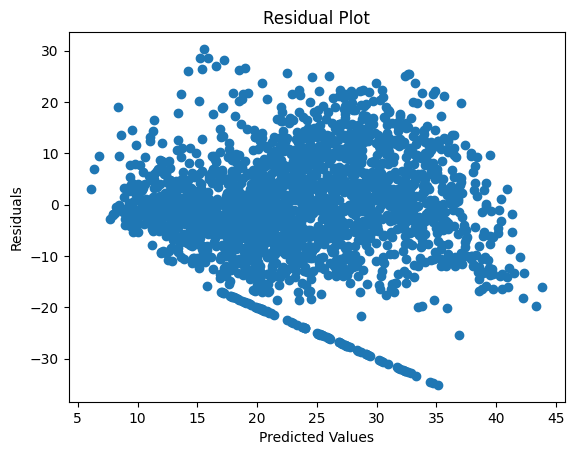

In [243]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

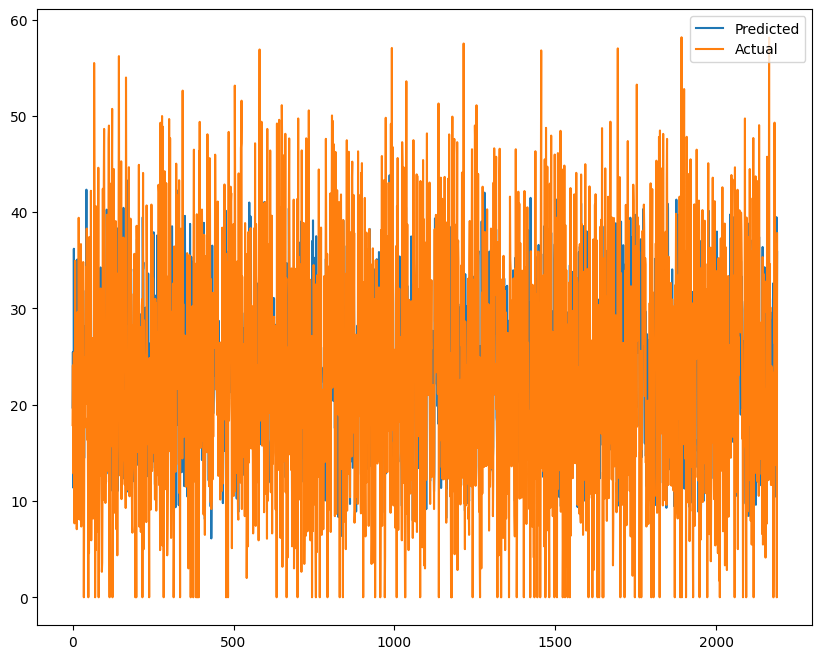

In [244]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

> Add blockquote

> Add blockquote


In [245]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [246]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [247]:
#check the score
ridge.score(X_train, y_train)

0.7912527761772726

In [248]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [249]:
y_pred_train_ridge

array([20.62298584, 30.79728204, 19.9313908 , ..., 34.40392233,
       23.28141619, 22.22957588])

In [250]:
y_pred_test_ridge

array([17.10269158, 23.09797634, 20.39407758, ..., 40.50590122,
        1.57892994, 31.35388445])

In [251]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.145126693828864
RMSE : 5.6696672471873395
MAE : 4.301221643579305
R2 : 0.7912527761772726
Adjusted R2 : 0.786672421592927


In [252]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
traning_df=pd.DataFrame(dict1,index=[1])

In [253]:
traning_df.head()

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Ridge regression,4.301,32.145,5.67,0.791,0.79


In [254]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 31.218732967563575
RMSE : 5.587372635466832
MAE : 4.260759424869219
R2 : 0.8023710592474951
Adjusted R2 : 0.79803466325526


In [255]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=pd.DataFrame(dict2,index=[1])

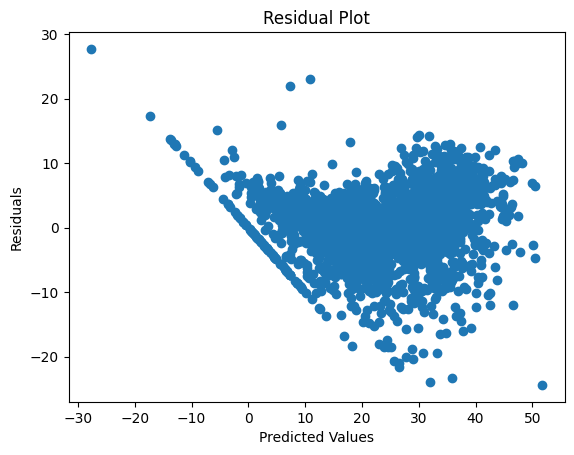

In [256]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

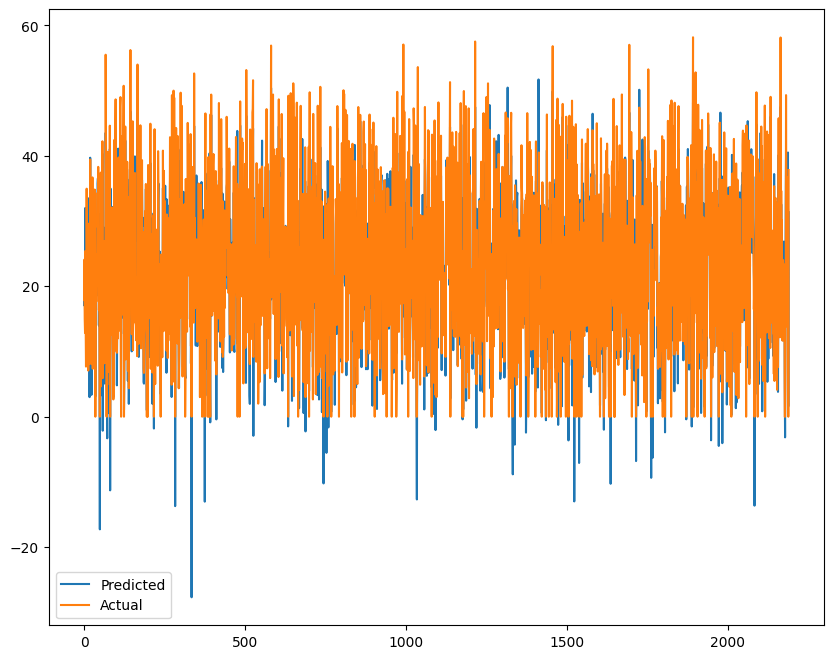

In [257]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **ELASTIC NET REGRESSION**

In [258]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [259]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [260]:
#check the score
elasticnet.score(X_train, y_train)

0.641910450609957

In [261]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [262]:
print(y_pred_train_en)
print(y_pred_test_en)

[15.68077567 31.24309653 17.3320067  ... 32.50762556 22.63580595
 19.21383635]
[19.01670529 24.63235562 18.23867345 ... 39.95161758 18.30435149
 32.95386409]


In [263]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 55.14245278133264
RMSE : 7.425796440876402
MAE : 5.653172410366239
R2 : 0.641910450609957
Adjusted R2 : 0.6340532102638636


In [264]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=pd.DataFrame(dict1,index=[1])

In [265]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.773040965512614
RMSE : 7.600857909835745
MAE : 5.765579824382158
R2 : 0.6342700742554702
Adjusted R2 : 0.6262451879296098


In [266]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=pd.DataFrame(dict2,index=[1])

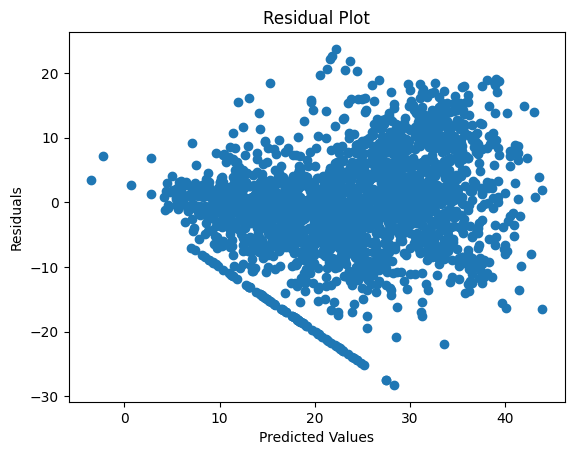

In [267]:
### Heteroscadacity- Residual plo
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

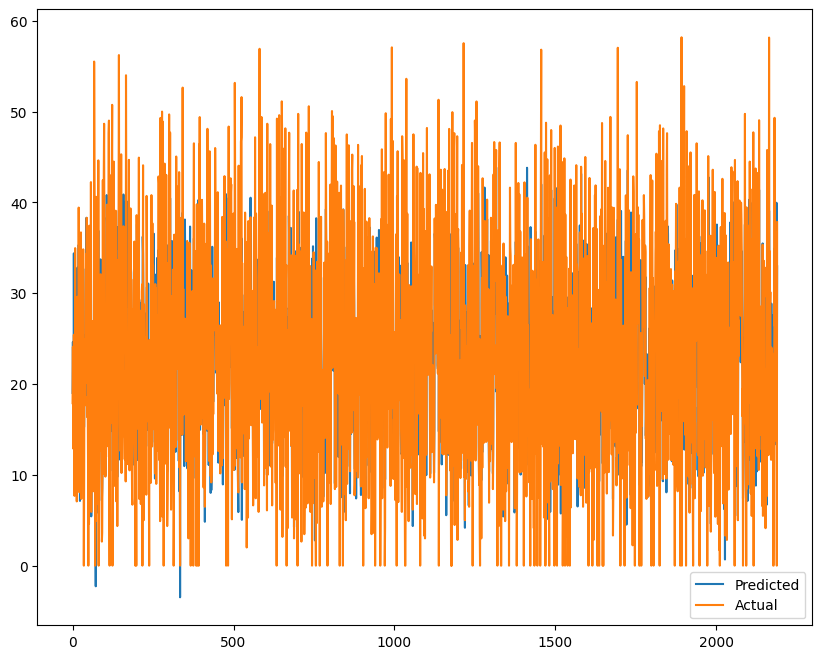

In [268]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

In [269]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [270]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [271]:
print(y_pred_train_d)
print(y_pred_test_d)

[22.53769997 36.83010798 13.6815737  ... 36.83010798 25.9943677
 17.31476348]
[14.77658846 36.83010798 16.07356408 ... 36.83010798 25.9943677
 36.83010798]


In [272]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6101338963644665
MSE : 60.03574593948292
RMSE : 7.748273739323032
MAE : 5.57948144339623
R2 : 0.6101338963644665
Adjusted R2 : 0.6015794113640602


In [273]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=pd.DataFrame(dict1,index=[1])

In [274]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 66.98783255484614
RMSE : 8.184609493118542
MAE : 5.861508937176434
R2 : 0.5759362045578365
Adjusted R2 : 0.5666313500359963


In [275]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=pd.DataFrame(dict2,index=[1])

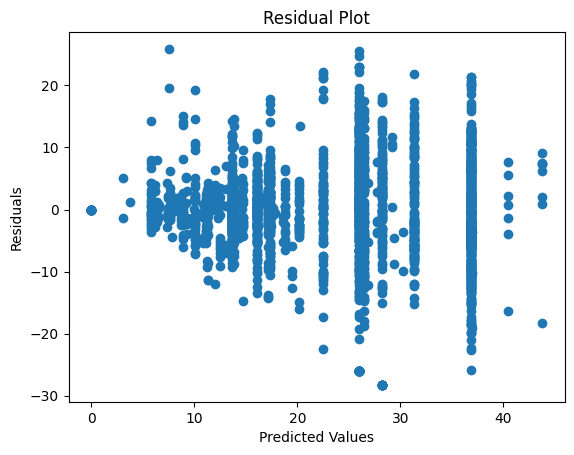

In [276]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


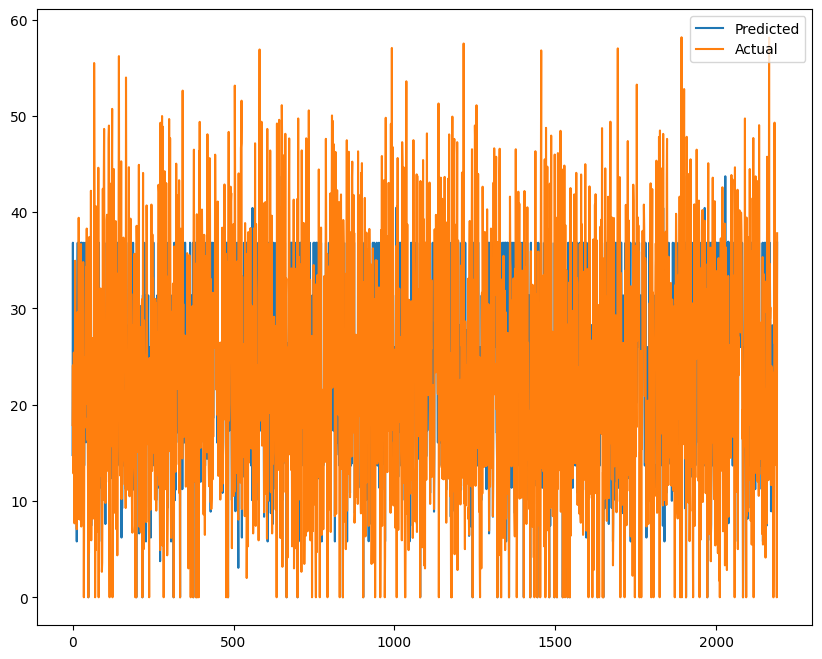

In [277]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [278]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [279]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [280]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9895153214433514
MSE : 1.6145427679256457
RMSE : 1.2706465944257064
MAE : 0.8009583375599675
R2 : 0.9895153214433514
Adjusted R2 : 0.9892852654712868


In [281]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=pd.DataFrame(dict1,index=[1])

In [282]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.490621120228713
RMSE : 3.5342072831440876
MAE : 2.1954026641931237
R2 : 0.9209286224429268
Adjusted R2 : 0.9191936295646904


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [283]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=pd.DataFrame(dict2,index=[1])

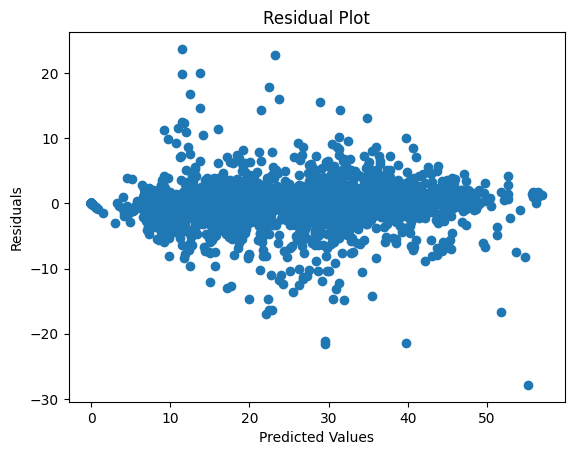

In [284]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [285]:
rf_model.feature_importances_

array([3.08714448e-01, 1.58190260e-01, 1.17645996e-02, 1.17697114e-02,
       3.22138266e-02, 3.06897068e-02, 1.28282708e-03, 5.22716841e-03,
       1.39649817e-02, 2.15579796e-02, 3.02215845e-02, 2.63043968e-02,
       8.72141149e-03, 4.04309199e-03, 1.34268813e-02, 1.02285641e-03,
       2.41084283e-03, 1.33025070e-03, 3.36612618e-04, 2.61379104e-04,
       3.82396662e-04, 1.39337774e-03, 3.69191993e-03, 1.02759655e-02,
       3.04303717e-02, 1.72968695e-02, 1.22103266e-02, 1.22199851e-02,
       9.38470713e-03, 3.56605795e-03, 4.31297454e-03, 8.80511276e-04,
       1.36392712e-02, 3.83601172e-03, 1.51687336e-01, 3.07050780e-04,
       4.48150167e-03, 1.41885080e-03, 1.58977485e-03, 2.42405053e-03,
       6.48804512e-04, 2.26156241e-03, 8.28709875e-04, 2.68592632e-03,
       4.51802119e-03, 7.60734720e-04, 1.94121130e-02])

## FEATURES STORED

In [286]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [287]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [288]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,temp,0.31
1,humidity,0.16
34,functioning_day_Yes,0.15
10,hour_4,0.03
4,sunlight,0.03
5,rain,0.03
24,hour_18,0.03
11,hour_5,0.03
25,hour_19,0.02
46,weekdays_weekend_1,0.02


In [289]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [290]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# **GRADIENT BOOSTING**

In [291]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [292]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [293]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8760091795221207
MSE : 19.09343061021
RMSE : 4.369603026615804
MAE : 3.3013097059201097
R2 : 0.8760091795221207
Adjusted R2 : 0.8732885592782083


**Looks like our train set's r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [294]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=pd.DataFrame(dict1,index=[1])

In [295]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 21.519381971053228
RMSE : 4.638898788619259
MAE : 3.496871316542865
R2 : 0.8637724128968803
Adjusted R2 : 0.8607832921714618


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [296]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=pd.DataFrame(dict2,index=[1])

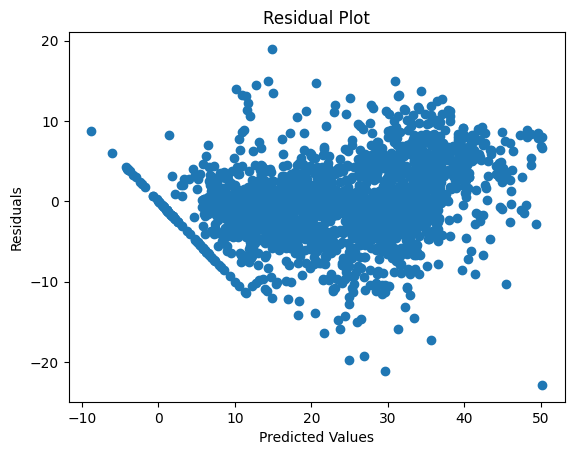

In [297]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [298]:
gb_model.feature_importances_

array([3.22777464e-01, 1.29059178e-01, 2.36316095e-04, 5.02544021e-04,
       4.89603250e-02, 6.53942926e-02, 9.41346905e-06, 3.54528297e-04,
       5.55116789e-03, 1.47540181e-02, 2.71652952e-02, 2.07853876e-02,
       5.53615753e-03, 4.21330488e-05, 1.03746894e-02, 0.00000000e+00,
       3.12010802e-03, 1.49189245e-03, 0.00000000e+00, 0.00000000e+00,
       4.65071042e-05, 0.00000000e+00, 1.92297365e-04, 7.41868419e-03,
       2.99824877e-02, 1.76286106e-02, 1.26241734e-02, 1.52003098e-02,
       1.26692962e-02, 3.78557652e-04, 2.35772283e-04, 4.18768111e-05,
       3.26950228e-02, 1.96041409e-03, 1.75602474e-01, 0.00000000e+00,
       1.48757418e-03, 1.02006460e-04, 5.02728704e-04, 4.25068394e-03,
       0.00000000e+00, 2.81327890e-03, 0.00000000e+00, 6.41893200e-03,
       4.85755587e-03, 7.62177268e-04, 1.60136680e-02])

#**Hyperparameter tuning**

##**Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [299]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [300]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

### **Importing Gradient Boosting Regressor**

In [301]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [302]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=5)

In [303]:
gb_optimal_model = gb_grid.best_estimator_

In [304]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [305]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [306]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.940843120722907
MSE : 9.109607995498802
RMSE : 3.0182127154159963
MAE : 2.1783965311680302
R2 : 0.940843120722907
Adjusted R2 : 0.9395450939600576


**Looks like our train set's r2 score value is 0.94 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [307]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 13.553329543600556
RMSE : 3.681484692838007
MAE : 2.6344483903165465
R2 : 0.9142011892617674
Adjusted R2 : 0.9123185823034589


In [308]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=pd.DataFrame(dict1,index=[1])

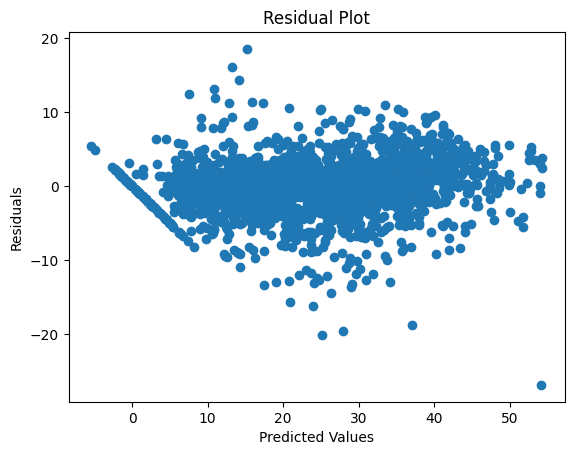

In [309]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [310]:
gb_optimal_model.feature_importances_

array([3.10705162e-01, 1.56715691e-01, 1.98897672e-03, 4.03860642e-03,
       3.58458023e-02, 4.42409720e-02, 9.26714685e-04, 1.00132162e-03,
       6.79980182e-03, 1.63261296e-02, 2.94736862e-02, 2.38088708e-02,
       5.80829198e-03, 5.25208051e-03, 1.21095863e-02, 1.21656974e-04,
       3.49758696e-03, 1.57374676e-03, 1.44499200e-04, 8.15950195e-05,
       6.88596751e-05, 4.31615993e-05, 1.45305900e-03, 8.34609005e-03,
       3.04471616e-02, 1.88628699e-02, 1.26615931e-02, 1.56645271e-02,
       1.03007874e-02, 1.55299811e-03, 1.64476571e-03, 2.29283112e-04,
       2.22538393e-02, 4.00367093e-03, 1.63340921e-01, 1.23988372e-05,
       1.47510013e-03, 3.96937601e-04, 1.02860709e-03, 4.23428406e-03,
       1.09792498e-03, 5.58702753e-03, 1.32551124e-04, 7.53514264e-03,
       5.61631078e-03, 1.05330966e-03, 2.04960388e-02])

# **Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.\
Subsequently, we employed 7 machine learning algorithms including Linear Regression,Lasso , Ridge, Elastic Net, Decision Tree, Random Forest and Gradient Booster. We also performed hyperparameter tuning to enhance the performance of our models. The evaluation of our models resulted in the following findings :

In [311]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

,,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
Training set,1,Gradient Boosting gridsearchcv,2.634,13.553,3.681,0.914,0.91
Test set,1,Gradient boosting regression,3.497,21.519,4.639,0.864,0.86


We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

* Gradient Boosting gridsearchcv model shows promising result with R2 score of 0.91, therefore it can be used to solve this problem.
* Temperatue, Functioning_Day_Yes, Humidity, Rainfall and  Solar radiation are major driving factors for the Bike rent demand.
* Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.
* People prefer to rent bike more in summer than in winter.
* Bike demand is more on clear days than on snowy or rainy days.
* Temperature range from 22 to 25(°C) has more demand for bike.

Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.

6. XGBoost is acting different from all the regressors as it is considering whether it is winter or not. And is it a working day or not. Though winter is also a function of temperature only but it seems this trick of XGBoost is giving better results.
7. XGBoostRegressor has the Least Root Mean Squared Error. So It can be considered as the best model for given problem.